# Primer ejercicio

Usar interpolación cúbica de $x$ y $y$ ya definidos a continuación para obtener 100 puntos más en un rango de $-3 \leq x \leq 3$. Graficar en una sola gráfica los puntos originales y los 100 puntos extra encontrados con la interpolación. En otra gráfica graficar los 100 puntos hallados por interpolación y la primera derivada de los puntos de la interpolación. Pista: ver cómo se hace en la parte donde se explica splxxx en el cuaderno de Jupyter teórico. 

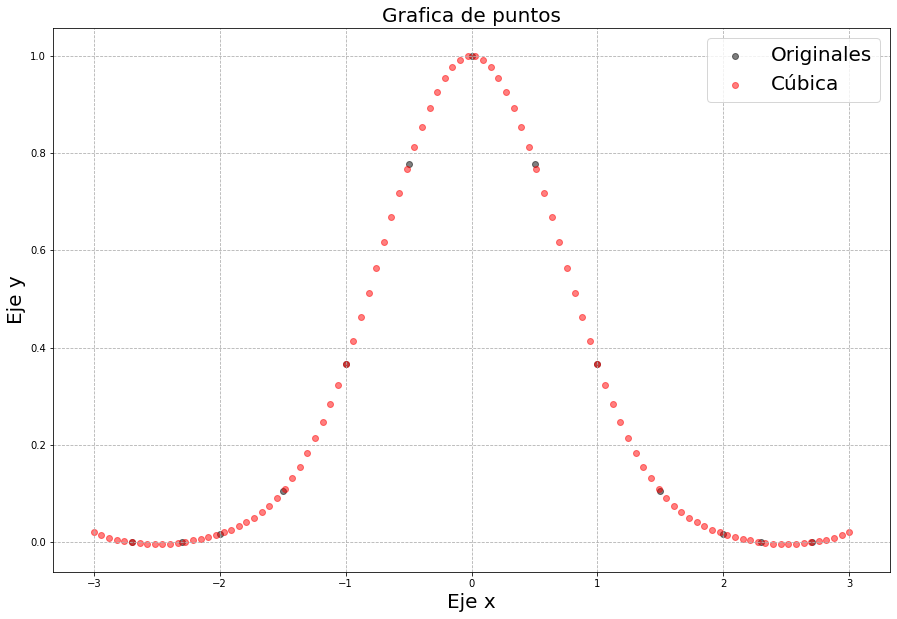

<Figure size 432x288 with 0 Axes>

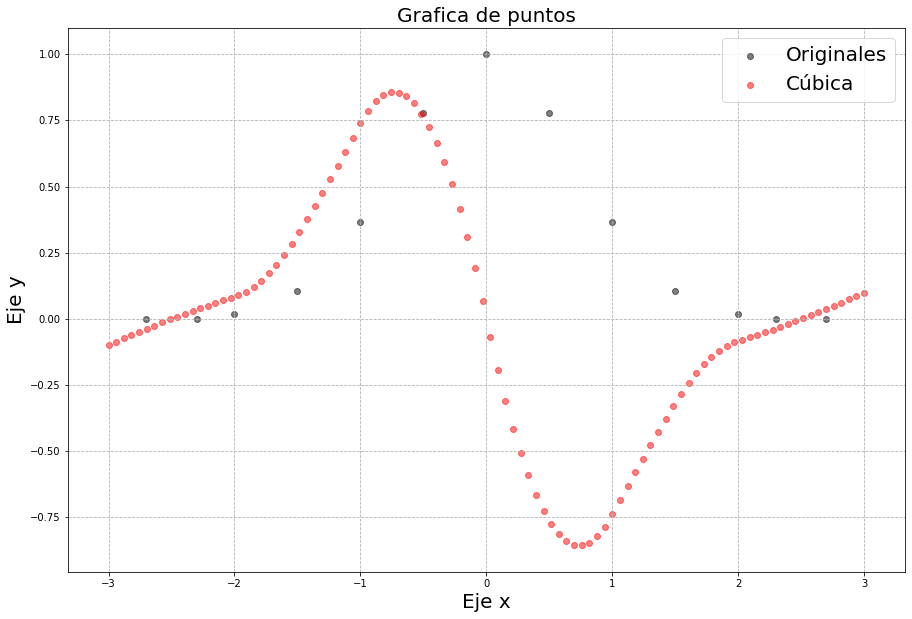

<Figure size 432x288 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import interpolate

x = np.array([-2.7,-2.3,-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.3, 2.7])
y = np.array([0, 0, 0.018, 0.105, 0.367, 0.778, 1.0, 0.778, 0.367, 0.105, 0.018, 0, 0])

f = interpolate.splrep(x, y, s=0, k=3) # Creamos una funcion de interpolacion para los puntos "x" y "y", donde "k" es el orden de la interpolación
x_nuevo = np.linspace(-3,3,100) # Definimos el rango del eje x con 100 puntos
y_nuevo = interpolate.splev(x_nuevo, f, der=0) # Hacemos uso de spldev para encontrar los respectivos valores de y. Los primeros dos parámetros son los nuevos valores de x y la funcion f de interpolación. El tercer argumento permite obtener derivadas de la curva que forman nuestros nuevos puntos: si der=0 obtenemos los valores de y, si der=1 obtenemos dy/dx y así sucesivamente.

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x, y, color="black", alpha=0.5, label="Originales") # Graficamos los puntos "x" y "y", de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo, y_nuevo, color="red", alpha=0.5, label="Cúbica") # Graficamos los nuevos 100 puntos de la interpolación
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

y_nuevo_prima = interpolate.splev(x_nuevo, f, der=1) # Primera derivada

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x, y, color="black", alpha=0.5, label="Originales") # Graficamos los puntos "x" y "y", de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo, y_nuevo_prima, color="red", alpha=0.5, label="Cúbica") # Graficamos los nuevos 100 puntos de la interpolación
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

# Segundo ejercicio

Cargar la matriz dentro del archivo Microcalcificacion.txt. Esta matriz tiene un tamaño de 20x20 (puede comprobarlo usted mismo). La idea de este ejercicio es usar interpolación cubica para obtener esta imagen pero con una mayor resolución, específicamente con una de 100x100. Graficar la imagen original y la interpolada. 

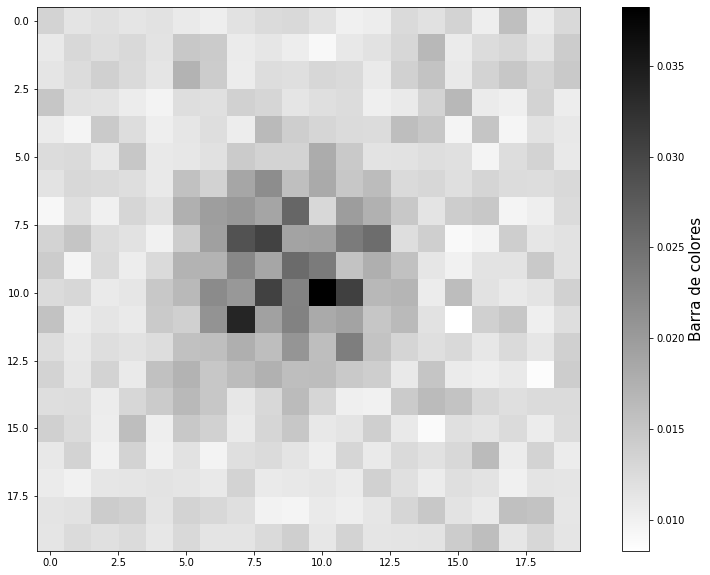

El tamaño de la matriz nueva será:  (100, 100)


<Figure size 432x288 with 0 Axes>

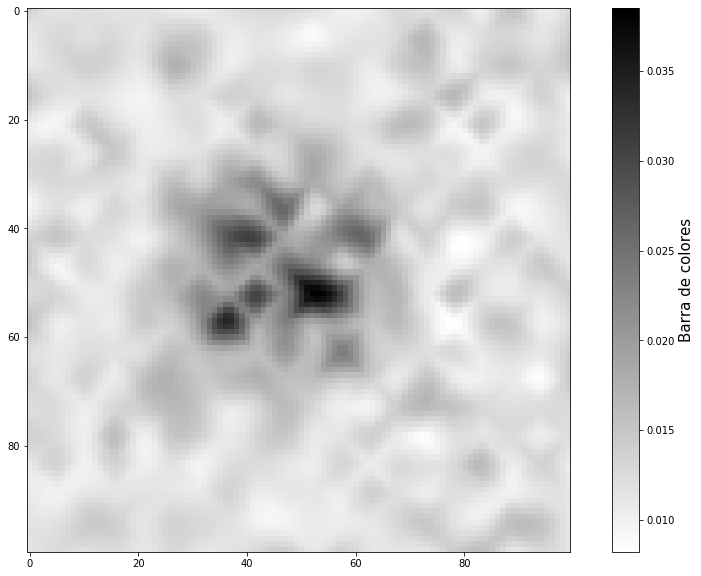

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata # Nos servirá para hacer la interpolación

datos_matriz = np.genfromtxt("Microcalcificacion.txt")

figura = plt.figure(figsize=(15,10))
imagen = plt.imshow(datos_matriz, cmap="binary") # Graficamos la imagen
barra_de_colores = figura.colorbar(imagen) # Graficamos la barra de colores asociada 
barra_de_colores.set_label("Barra de colores", rotation=90, fontsize=15) # Ponemos un titulo a la barra de colores. rotation=90 hace que el titulo esté rotado 90
plt.show()
plt.clf()


x = [] # Creamos nuestros puntos "x", "y", "z"
y = []
z = []

tamano_matriz = np.shape(datos_matriz)
filas = tamano_matriz[0]
columnas = tamano_matriz[1]

for i in range(filas):
    for j in range(columnas):
        x.append(i)
        y.append(j)
        z.append(datos_matriz[i,j])

x = np.array(x)
y = np.array(y)
z = np.array(z)

# Aca ya tenemos nuestros datos x,y,z. Ahora solo queda interpolarlos.

grid_x, grid_y = np.mgrid[0:19:100j, 0:19:100j] # Creamos la rejilla, tal como se hizo en el primer ejemplo de interpolación en 2D. En este caso exigimos que el nuevo tamaño de la imagen sea de 100x100 y se pone 0:9 dado que los valores de i y j varian desde 0 hasta 19 en principio.  

print("El tamaño de la matriz nueva será: ", np.shape(grid_x)) # Fijarse que el tamaño de la matriz si es el que queremos

puntos_xy = np.vstack((x,y)).T # Hacemos este paso que ya se había explicado en el ejemplo previo

imagen_nueva = griddata(puntos_xy, z, (grid_x, grid_y), method='cubic') # Hacemos interpolacion cúbica. Solo permite "linear", "quadratic" y "cubic"

figura = plt.figure(figsize=(15,10))
imagen = plt.imshow(imagen_nueva,cmap="binary") # Graficamos la imagen.
barra_de_colores = figura.colorbar(imagen) # Graficamos la barra de colores asociada 
barra_de_colores.set_label("Barra de colores", rotation=90, fontsize=15) # Ponemos un titulo a la barra de colores. rotation=90 hace que el titulo esté rotado 90
plt.show()

# Tercer ejercicio

Cargar los datos dentro del archivo de texto Datos.txt. Este archivo contiene dos columnas de datos que ambas forman una matriz. La primera columna son los valores en $x$ de un conjunto de puntos y la segunda columna los valores en $y$. Con los respectivos arrays de las posiciones en $x$ y $y$ tratar de ajustar estos puntos a la función modelo $$f(x,a,b) = ae^{-bx^2}.$$ Imprimir los valores óptimos de los parámetros $a$ y $b$, así como los errores asociados a estos parámetros. También graficar en una misma gráfica los puntos obtenidos del archivo de texto y la función modelo con los parámetros óptimos ya encontrados.

Algunos tips son:
- Para cargar los datos del archivo de texto basta con hacer: datos = np.genfromtxt("Datos.txt")
- Para obtener la primera columna de una matriz $M$ basta con hacer: M\[:,0\] (cogemos todas las filas pero solo la columna cero). En el caso de la segunda columna solo cambiamos el cero por un 1. 
- Ver la sección de Ajuste de Curvas en el cuaderno de Jupyter teórico

Array con los valores óptimos de los parámetros a y b:
[5.12149896 3.17262086]


Matriz de covarianza
[[0.01437551 0.01187348]
 [0.01187348 0.02942076]]


Errores asociados a cada parámetro:
[0.11989791 0.1715248 ]


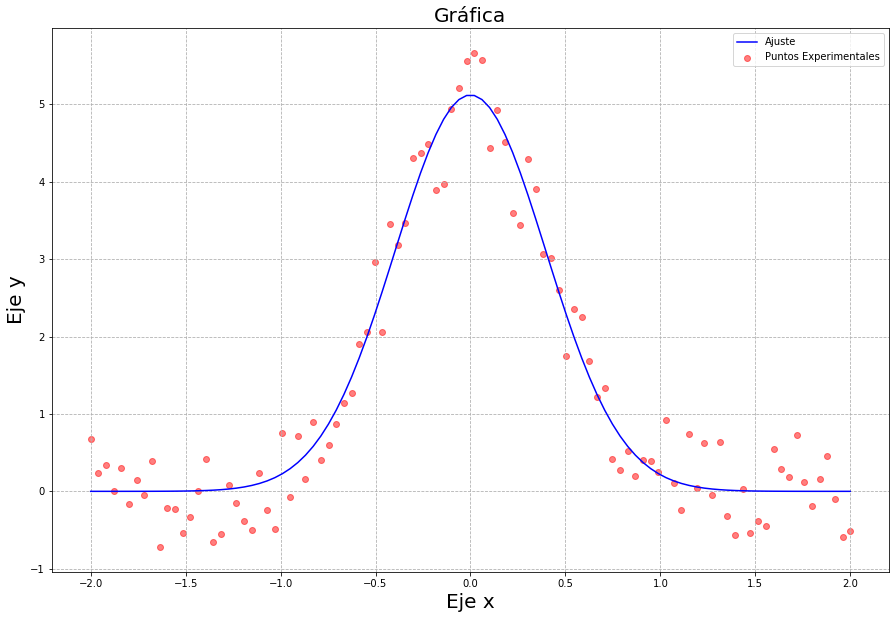

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

datos = np.genfromtxt("Datos.txt")
x = datos[:,0]
y = datos[:,1]


def funcion_modelo(x,a,b): # Definimos la función modelo a la que se quieren ajustar los puntos 
    return a*np.exp(-b*x**2)

popt, pcov = curve_fit(funcion_modelo,x,y) # Usamos curve_fit() para poder encontrar los valores óptimos de los parámetros a y b. curve_fit() nos devuelve un array llamado popt con los valores óptimos de los parámetros y también nos da la matriz de covarianza pcov. La matriz de covarianza sirve para encontrar los errores asociados a los parámetros óptimos 
errores = np.sqrt(np.diag(pcov)) # para encontrar los errores debemos extraer la diagonal de la matriz de covarianza y luego, a este array con los elementos de la siagonal, sacarle la raiz cuadrada. Esto tiene que ser así ya que la diagonal de la matriz de covarianza tiene el valor de la varianza (sigma^2) asociado a cada parámetro. El error (sigma) no es más que la raiz de la varianza, también llamado desviación estandar.

print("Array con los valores óptimos de los parámetros a y b:")
print(popt)
print("\n")
print("Matriz de covarianza")
print(pcov)
print("\n")
print("Errores asociados a cada parámetro:")
print(errores)

figura = plt.figure(figsize=(15,10))
plt.grid(b=True, linestyle="--")
plt.scatter(x, y, color="red", alpha=0.5, label="Puntos Experimentales") # Graficamos los puntos originales
plt.plot(x, funcion_modelo(x,*popt), color="blue", label="Ajuste")# Graficamos la función modelo con los parámetros óptimos. Pudimos escribir funcion_modelo(x,popt[0],popt[1]) ya que la funcion_modelo() tiene 3 parámetros de entrada, pero poner funcion_modelo(x,*popt) es un shortcut para hacer exactamente lo mismo y sirve para cualquier cantidad de parámetros que usemos
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend()
plt.show()

# Cuarto ejercicio

Ajustar los puntos (x,y) ya definidos abajo a un polinomio de grado 3. Imprimir el valor del polinomio en $x=8.5155$. Graficar en una misma gráfica los puntos ya dados y la gráfica del polinomio para $0\leq x \leq 20$.

C:\Users\Paula\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
Coeficientes del polinomio de grado 3
[-0.00254042  0.00729636  0.70520196  1.03435419]


Valor del polinomio en x = 8.5155:  5.999900880831522


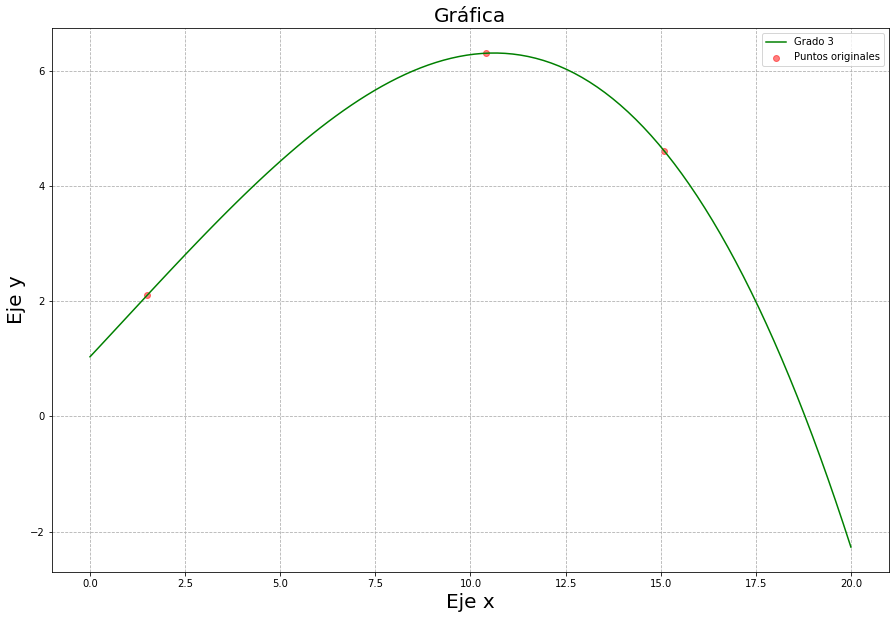

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.array([1.5, 10.4, 15.1])
y = np.array([2.1, 6.3, 4.6])

coef_3 = np.polyfit(x,y,3) # Uso np.polyfit() que recibe como parámetros los puntos en "x" y "y", además del orden del polinomio que quiero ajustar a esos puntos. Esta función retorna los 4 coeficientes del polinomio en un array. Un polinomio de orden 3 tiene 4 coeficientes asociados: c_1 x^3 + c_2 x^2 + c_3 x + c_4
print("Coeficientes del polinomio de grado 3")
print(coef_3)
print("\n")

p3 = np.poly1d(coef_3) # Construye una función a partir de los coeficientes (retorna una función). p3 representa el polinomio de grado 3 y puede usarse para saber que valor toma el polinomio en un x dado: p.ej. si quiero saber cuánto vale este polinomio en x=5 entonces imprimo p3(5)
print("Valor del polinomio en x = 8.5155: ", p3(8.5155))

x_n = np.linspace(0,20,100) # Creo un nuevo array para el eje x, esto con el fin de graficar el polinomio entre 0 y 20

figura = plt.figure(figsize=(15,10))
plt.grid(b=True, linestyle="--")
plt.scatter(x, y, color="red", alpha=0.5, label="Puntos originales")
plt.plot(x_n, p3(x_n), color="green", label="Grado 3")# Graficamos el polinomio de grado 3
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend()
plt.show()